<a href="https://colab.research.google.com/github/AprendaPracticando/AnaliticaPythonR1/blob/main/LABS/LAB_11_03_Integracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 11.03: Integración de datos con Python y pandas**

En este Lab se utilizarán todas las técnicas aprendidas para realizar una integración de datos. A partir de un conjunto de archivo dispersos, se integrará un master de datos que pueda ser utilizado para trabajos de analítica de datos.

La cámara de bienes raíces del condado King County, en Washington, tiene las operaciones de venta de los años 2022 y 2023. Se desea hacer un trabajo de analítica para comparar la competencia que tienen tres agentes inmobiliarios: GINA JEANNOT, FRANK PAINTER – NEOHOMES, y SKYLINE PROPERTIES.

Dispones del siguiente esquema de datos, que deberás integrar:


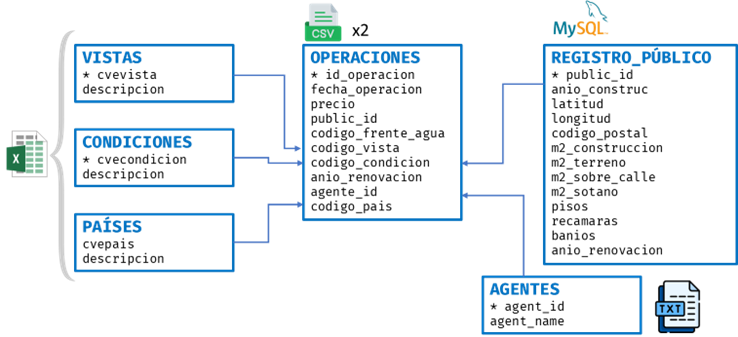

Las tareas por hace son las siguientes:
1.	Documentar la lista de fuentes.
2.	Integrar un solo conjunto de datos a partir de dos.
3.	Generar categóricos descriptivos para el año, año-mes, y mes de operación.
4.	Recuperar los catálogos de diferentes fuentes.
5.	Homologación de campos, tipos y nombres.
6.	Integrar el master, asociando los catálogos y registro público, con operaciones.
7.	Guardar el master en un archivo CSV.


## **Integrar un solo conjunto de datos a partir de dos**

En algunas ocasiones se tienen que integrar datos que tienen la misma estructura, pero tienen datos diferentes por diferencia en la temporalidad, o algún filtro. En nuestro caso, tenemos dos archivos que contienen la misma estructura, pero un tiene datos de 2022, y otro de 2023, en unos DataFrame llamados **`op_2022`** y **`op_2023`**, respectivamente.

La secuencia de trabajo es la siguiente:
1.	Se importan las librerías que han de ocuparse para el procesamiento de datos (pandas) y el trabajo con fechas (numpy y datetime).
2.	Se almacena en variables la liga de acceso a datos RAW en GitHub.
3.	Como no se requieren todas las columnas contenidas en los archivos, se enumeran las columnas de interés en una lista.
4.	Como queremos importar los datos especificando el tipo de dato que nos interesa que tengan en nuestro DataFrame, se especifican los tipos de dato deseados, en un diccionario.
5.	Se cargan los datos usando el método **`read_csv()`** de pandas.
6.	Se muestra la lista de campos correspondiente a los datos recuperados.
7.	Como solo se requieren datos de ciertos agentes inmobiliarios, se realiza un filtro de filas, dejado solo las operaciones de Gina Jeannot, Frank Painter, y Skyline.
8.	Se normalizan los tipos de datos de los datos recuperados, con el fin de que solo se tengan como datos de valor aquellos que ameriten cálculos.
9.	Se concatenan los DataFrames, para tener un solo conjunto de datos.


In [ ]:
# Se importan las librerías requeridas para la 
# integración.
from numpy import datetime64
import pandas as pd
import datetime as dt

In [ ]:
# Se declaran variables con las ligas de acceso a 
# los datos en GitHub.

# Operaciones 2022
url_2022='https://raw.githubusercontent.com/AprendaPracticando/AnaliticaPythonR1/main/data/operaciones_2022.csv'

# Operaciones 2023
url_2023='https://raw.githubusercontent.com/AprendaPracticando/AnaliticaPythonR1/main/data/operaciones_2023.csv'


In [ ]:
# Se define una lista que enumera las columnas 
# de interés.
columnas_requeridas=['id_operacion', 'fecha_operacion', 
    'precio', 'public_id', 'codigo_frente_agua', 
    'codigo_vista', 'codigo_condicion',
    'agente_id', 'codigo_pais'
]

# Se define un diccionario que enumera los tipos 
# de datos esperados para las columnas.
tipos_requeridos={
    'id_operacion':int,
    'fecha_operacion':str,
    'precio':float,
    'public_id':int,
    'codigo_frente_agua':int,
    'codigo_vista':int,
    'codigo_condicion':int,
    'agente_id':int,
    'codigo_pais':int
}

In [ ]:
# Se lee el CSV con los datos de 2022, recuperando
# las columnas de interés, con el tipo de dato
# deseado. 
op_2022=pd.read_csv(url_2022,
                    usecols=columnas_requeridas,
                    dtype=tipos_requeridos
                    )

# Se muestran los datos y la volumetría de filas.
op_2022.info()

In [ ]:
# Se filtran los datos, para que solamente queden
# las filas de los agentes sujetos a análisis.
# 2 es Gina Jeannot
# 7 es Frank Painter
# 9 es Skyline

op_2022=op_2022[op_2022['agente_id'].isin([2,7,9])]


In [ ]:
# Se muestran los datos y la volumetría de filas.
op_2022.info()


In [ ]:
# Se modifican los tipos de datos de las columnas
# para mejorar su tratamiento.

# id_operacion se convierte a cadena (str / object)
op_2022['id_operacion']=op_2022['id_operacion'].astype(str)

# fecha_opercion se convierte a fecha, con formato DD/MM/AAAA.
op_2022['fecha_operacion']=pd.to_datetime(op_2022['fecha_operacion'], format='%d/%m/%Y')

# public_id se convierte a cadena (str / object)
op_2022['public_id']=op_2022['public_id'].astype(str)

# codigo_frente_agua se convierte a cadena (str / object)
op_2022['codigo_frente_agua']=op_2022['codigo_frente_agua'].astype(str)

# codigo_vista se convierte a cadena (str / object)
op_2022['codigo_vista']=op_2022['codigo_vista'].astype(str)

# codigo_condicion se convierte a cadena (str / object)
op_2022['codigo_condicion']=op_2022['codigo_condicion'].astype(str)

# agente_id  se convierte a cadena (str / object)
op_2022['agente_id']=op_2022['agente_id'].astype(str)

# codigo_pais se convierte a cadena (str / object)
op_2022['codigo_pais']=op_2022['codigo_pais'].astype(str)

# Se muestran los datos y la volumetría de filas.
op_2022.info()


In [ ]:
# Se repite el proceso para los datos de 2023.

# Carga de datos
op_2023=pd.read_csv(url_2023,
                    usecols=columnas_requeridas,
                    dtype=tipos_requeridos
                    )

# Filtrado de agentes
op_2023=op_2023[op_2023['agente_id'].isin([2,7,9])]

# Conversión de tipos
op_2023['id_operacion']=op_2023['id_operacion'].astype(str)
op_2023['fecha_operacion']=pd.to_datetime(op_2023['fecha_operacion'], format='%d/%m/%Y')
op_2023['public_id']=op_2023['public_id'].astype(str)
op_2023['codigo_frente_agua']=op_2023['codigo_frente_agua'].astype(str)
op_2023['codigo_vista']=op_2023['codigo_vista'].astype(str)
op_2023['codigo_condicion']=op_2023['codigo_condicion'].astype(str)
op_2023['agente_id']=op_2023['agente_id'].astype(str)
op_2023['codigo_pais']=op_2023['codigo_pais'].astype(str)

# Se muestran los datos y la volumetría de filas.
op_2023.info()


In [ ]:
# Se muestra el número de filas de cada uno de
# los DataFrames creados.
print(len(op_2022))
print(len(op_2023))

# Se concatenan (unen) las filas de los dos
# DataFrames, generando un nuevo índice,
# omitiendo a los índices originales.
operaciones=pd.concat([op_2022, op_2023], 
                      ignore_index=True)

# Se imprime el número de filas de las operaciones
# integradas.
print(len(operaciones))


## **Generar categóricos descriptivos para el año, año-mes, y mes de operación**

A partir de un dato fecha/hora, se generan descriptivos categóricos que serán útiles al momento de hacer analítica, con etiquetas útiles para series de tiempo. 

Se requiere una columna llamada **`año`**, que contendrá el año en formato cadena, **`año_mes`**, que muestre el año y el número de mes, en formato cadena, y **`mes`**, que muestre el número de mes, más el nombre completo del mes, en mayúsculas, en formato cadena.

In [ ]:
# Se generan categóricos descriptivos para el 
# año (AAAA), el año con el mes (AAAA-MM), y el
# mes con el nombre, en mayúsculas.
operaciones['año'] = operaciones['fecha_operacion'].dt.strftime('%Y')


operaciones['año_mes'] = operaciones['fecha_operacion'].dt.strftime('%Y-%m')
operaciones['mes'] = operaciones['fecha_operacion'].dt.strftime('%m-%B').str.upper()

# Se imprime una tabla de frecuencia de cada
# uno de los categóricos generados.
print(operaciones['año'].value_counts(),'\n')
print(operaciones['año_mes'].value_counts(),'\n')
print(operaciones['mes'].value_counts(),'\n')


## **Recuperar los catálogos de diferentes fuentes**

### ***Recuperando datos desde Excel***

Para el caso de los catálogos de vistas, condiciones de las viviendas y paí-ses, los datos se encuentran en un Libro de Excel llamado **`catalogos.xlsx`**; los catálogos se encuentran en una misma Hoja llamada **`Categóricos`**.
El archivo **`catalogos.xlsx`** se debe descargar de la carpeta data del repositorio GitHub que acompaña al libro.

https://github.com/AprendaPracticando/AnaliticaPythonR1/tree/main/data 

Descarga el archivo del repositorio, y cárgalo en tu ambiente de **Google Colab**. 

1. **VISTAS**: están en el Rango de celdas **`A2:B7`**
1. **CONDICIONES**: están en el Rango de celdas **`A10:B15`**
1. **PAÍSES**: están en el Rango de celdas **`A18:B28`** 

Se leerán usando el método de pandas **`read_excel()`**, y se guarda el resultado en los DataFrame **`vistas`**, **`condiciones`** y **`países`**.

In [ ]:
# Se recuperan los catálogos desde Excel

# Recuperación desde el Rango de celdas 
# A2:B7, en la Hoja Catálogos, para extraer
# las vistas
vistas=pd.read_excel('catalogos.xlsx', 
                     sheet_name='Categóricos',
                     usecols='A:B', skiprows=1, 
                     nrows=5)

# Muestra lo recuperado.
print(vistas,'\n')

# Recuperación desde el Rango de celdas 
# A10:B15, en la Hoja Catálogos, para extraer
# las condiciones.
condiciones=pd.read_excel('catalogos.xlsx', 
                     sheet_name='Categóricos',
                     usecols='A:B', skiprows=9, 
                     nrows=5)

# Muestra lo recuperado.
print(condiciones,'\n')

# Recuperación desde el Rango de celdas 
# A18:B28, en la Hoja Catálogos, para extraer
# los países.
países=pd.read_excel('catalogos.xlsx', 
                     sheet_name='Categóricos',
                     usecols='A:B', skiprows=17, 
                     nrows=10)

# Muestra lo recuperado.
print(países,'\n')


### ***Recuperando datos desde archivo de texto sin delimitadores***

El caso del catálogo de agentes es distinto. Los datos se encuentran en un archivo textual, que en la primera fila contiene el nombre de las columnas, y a partir de la segunda línea son datos. 

La primera columna corresponde al id del agente, y la segunda columna es el nombre del agente. 

El id del agente está desde la posición 1 a la 10, mientras que el nombre del agente está de la posición 11 a la 40.

Para recuperar el contenido se utiliza el método **`read_fwf()`** de pandas, a partir de un archivo llamado **`agentes_inmobiliarios.txt`**, que se encuentra en GitHub y que puede ser recuperado en formato RAW, a partir de una liga de internet (URL).


In [ ]:
# Liga para recuperar el archivo TXT en modo RAW, desde GitHub
url_txt='https://raw.githubusercontent.com/AprendaPracticando/AnaliticaPythonR1/main/data/agentes_inmobiliarios.txt'

# Se recupera la información del archivo, dividiendo los campos
# terminando el primero en la columna 10, y el segundo en la
# columna 40, infiriendo si existe o no encabezados.
# Encontrará encabezados porque la primera fila contiene sólo
# etiquetas, pero de la fila 2 en adelante, se encuentran 
# números en la primera columna.
# Se usa read_fwf() (fixed width formatted)
agentes=pd.read_fwf(url_txt,
                    widths=[10,40],
                    header='infer')

# Se muestra lo recuperado
print(agentes)


### ***Recuperando información desde BD MySQL***

Para recuperar los datos del registro público, se debe acceder a una base de datos MySQL. Para poder acceder a los datos, es necesario que instale el conector a base de datos MySQL de Python, ejecutando la siguiente línea.

In [ ]:
!pip install mysql-connector-python

La estructura de la base de datos a la cual nos vamos a conectar es la siguiente:

```
CREATE TABLE registro_publico(
    public_id CHAR(8),
    anio_construc CHAR(4),
    latitud FLOAT,
    longitud FLOAT,
    codigo_postal CHAR(5),
    m2_construccion FLOAT,
    m2_terreno FLOAT,
    m2_sobre_calle FLOAT,
    m2_sotano FLOAT,
    pisos INT,
    recamaras INT,
    banios FLOAT,
    anio_renovacion CHAR(4),
    PRIMARY KEY (public_id)
)
```

In [ ]:
# Se importa el conector a MySQL
import mysql.connector

# Establecer la conexión con la base de datos
mydb = mysql.connector.connect(
  host="MYSQL5043.site4now.net",
  user="9c7dd4_king",
  password="P@ssw0rd",
  database="db_9c7dd4_king"
)


In [ ]:
# Definir la consulta SQL
query = "SELECT * FROM registro_publico;"

# Leer los datos desde MySQL y cargarlos en un DataFrame
registro_publico = pd.read_sql(query, con=mydb, index_col=None)

# Se ven los datos cargados
registro_publico

In [ ]:
# Se cierra la conexión

mydb.close()

In [ ]:
# Se elimina la primera columna, porque no se ocupa
registro_publico.drop(index=0)

## **Homologación de campos, tipos y nombres**

In [ ]:
# El campo de coincidencia en operaciones se llama
# codigo_vista, mientras que en vista se llama cvevista.

# El campo de coincidencia en operaciones es de
# tipo object, y en vistas es int64.

# El campo descriptivo en vista se llama descripción
# al igual que en otros catálogos.

# Se ven los nombres actuales de columnas
print(vistas.dtypes)

# Se cambian los nombres de columna de vista, a) Para 
# homologación con operaciones, y b) Difereciarlo de otras 
# descripciones en otros catálogos.
vistas.rename(columns={
    'cvevista':'codigo_vista',
    'descripcion':'vista'
    }, 
    inplace=True)

# Se comprueba el cambio
print(vistas.dtypes)


In [ ]:
# Se cambia el tipo de dato en vista, para homologarlo en
# operaciones.
vistas['codigo_vista']=vistas['codigo_vista'].astype(str)

# Se ve el resultado
vistas.dtypes

In [ ]:
# El campo de coincidencia en operaciones se llama
# codigo_condicion, mientras que en condiciones se llama
# cvecondicion.
# El campo de coincidencia en operaciones es de
# tipo object, y en condiciones es int64.
# El campo descriptivo en condiciones se llama descripción
# al igual que en otros catálogos.

# Se cambian los nombres de columna de condiciones, a) Para 
# homologación con operaciones, y b) Diferenciarlo de otras 
# descripciones en otros catálogos.
condiciones.rename(columns={'cvecondicion':'codigo_condicion',
            'descripcion':'condición'}, inplace=True)

# Se cambia el tipo de dato en vista, para homologarlo en
# operaciones.
condiciones['codigo_condicion']=condiciones['codigo_condicion'].astype(str)

# Se ve el resultado
condiciones.dtypes


In [ ]:
# El campo de coincidencia en operaciones se llama
# codigo_pais, mientras que en países se llama
# cvepais.
# El campo de coincidencia en operaciones es de
# tipo object, y en países es int64.
# El campo descriptivo en países se llama descripción
# al igual que en otros catálogos.

# Se cambian los nombres de columna de países, a) Para 
# homologación con operaciones, y b) Diferenciarlo de otras 
# descripciones en otros catálogos.
países.rename(columns={'cvepais':'codigo_pais',
                       'descripcion':'país'}, inplace=True)

# Se cambia el tipo de dato en vista, para homologarlo en
# operaciones.
países['codigo_pais']=países['codigo_pais'].astype(str)

# Se ve el resultado
países.dtypes


In [ ]:
# agente_id, mientras que en agentes se llama
# agent_id.
# El campo de coincidencia en operaciones es de
# tipo object, y en agentes es int64.

# Se cambian los nombres de columna de países, a) Para 
# homologación con operaciones.
agentes.rename(columns={'agent_id':'agente_id',
                       'agent_name':'agente'}, inplace=True)

# Se cambia el tipo de dato en vista, para homologarlo en
# operaciones.
agentes['agente_id']=agentes['agente_id'].astype(str)

# Se ve el resultado
agentes.dtypes


## **Integrar el master, asociando los catálogos y registro público, con operaciones**

In [ ]:
# Asociando Vistas
operaciones=operaciones.merge(vistas, 
                  on='codigo_vista',
                  how='inner')

# Asociando Condiciones
operaciones=operaciones.merge(condiciones, 
                  on='codigo_condicion',
                  how='inner')

# Asociando País
operaciones=operaciones.merge(países, 
                  on='codigo_pais',
                  how='inner')

# Asociando Agentes
operaciones=operaciones.merge(agentes, 
                  on='agente_id',
                  how='inner')

# Asociando Registro público
operaciones=operaciones.merge(registro_publico, 
                  on='public_id',
                  how='inner')

# Ver el resultado
operaciones.info()


## **Guardar el master en un archivo CSV**

In [ ]:
# Se guarda el DataFrame integrado, y se guarda en un
# archivo CSV, con encabezados, sin incluir el índice
# como columna.
operaciones.to_csv('operaciones_master.csv', 
                   header=True, index=False)

# Revisar en Google Colab la integración del archivo.
